<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing a Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing a DataSet**

In [2]:
data = pd.read_csv("/content/gld_price_data.csv")

**Data Preprocessing**

In [4]:
# Top 5 Rows of DataSet
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# Last 5 Rows of DataSet
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# Number of Rows and Columns
data.shape
print("Number of Rows: ",data.shape[0])
print("Number of Columns: ",data.shape[1])

Number of Rows:  2290
Number of Columns:  6


In [7]:
# Getting Information of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Data Types
data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

**Statistical Measures**

In [9]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Missing Values**

In [12]:
print("Any Missing Values: ",data.isnull().values.any())

Any Missing Values:  False


In [13]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**Drop Duplicates**

In [14]:
dup_data = data.duplicated().any()

In [15]:
print("Any Duplicates Values: ",dup_data)

Any Duplicates Values:  False


In [16]:
data = data.drop_duplicates()

**Correlation**                                                
1) Positive Correlation              
2) Negative Correlation

In [17]:
correlation = data.corr()

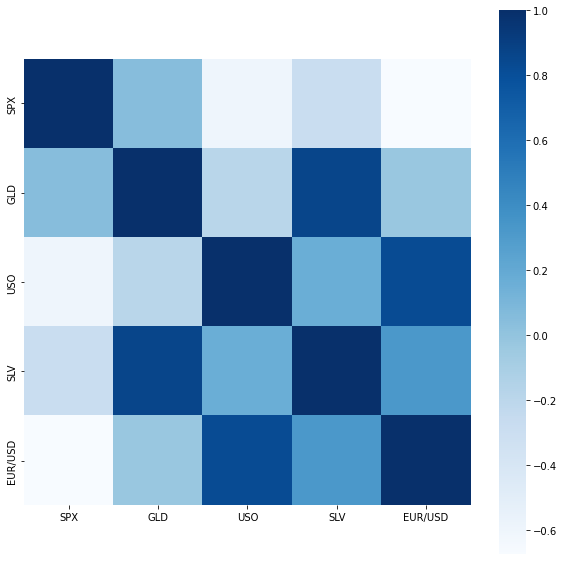

In [19]:
# Constructing Heatmap to understand a correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation,cbar = True,square = True,fmt = ".1f",annot_kws = {"size":10},cmap = "Blues")

In [22]:
# Correlation Values
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


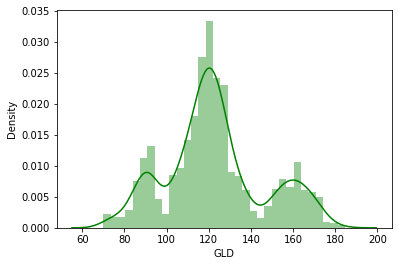

In [25]:
# Checking the Distribution of Gold Price
sns.distplot(data["GLD"],color = "green")

**Separating of DataSet**

In [26]:
X = data.drop(["Date","GLD"],axis = 1)
y = data["GLD"] 

**Train And Test Split**

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 7)

**Modelling**

Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

**Evaluation Metrics**

Prediction

In [31]:
y_pred = RF.predict(X_test)
y_pred

array([106.51060097, 104.46749931, 146.47110164, 116.74530079,
       155.26530071, 126.970701  , 146.97950318, 146.51039999,
       121.80279953, 121.62749879, 118.49380138, 132.98660003,
        85.13169961,  92.42180065, 119.6923009 , 163.24559767,
       118.77490185, 115.94990036, 125.3165988 , 106.85960028,
       160.70700073, 122.74130006, 161.97419805, 122.81579911,
       119.96629999, 168.94149755, 139.00530243, 120.47680019,
        92.56120049, 121.69929977,  94.2940019 , 159.72989875,
       113.95710119, 152.37440179,  95.32789961, 156.45279867,
       117.93949851, 105.09920094, 121.02649953, 142.94379768,
       159.70030215,  80.54540141, 114.94449971, 102.07219965,
        90.94379985, 175.82530168, 125.40070046,  89.64740179,
       108.76179821, 128.92880286, 127.17430066, 129.00770121,
        89.60239972, 120.92639959, 140.73150063, 155.7886007 ,
       122.80849882, 127.2957004 , 125.6617006 ,  96.71739927,
       119.81199987, 125.10410011, 124.44349898, 108.23

In [32]:
df = pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
df

,Actual,Prediction
1782,106.949997,106.510601
1673,103.930000,104.467499
868,154.869995,146.471102
2035,116.730003,116.745301
961,154.770004,155.265301
...,...,...
1909,124.779999,125.376400
858,167.320007,158.297399
95,86.650002,87.624599
1401,124.940002,124.333299


In [33]:
from sklearn import metrics
print("R2-Score: ",metrics.r2_score(y_test,y_pred))

R2-Score:  0.9855637651804834


Compare Actual Values and Predictio Values

In [35]:
y_test = list(y_test)

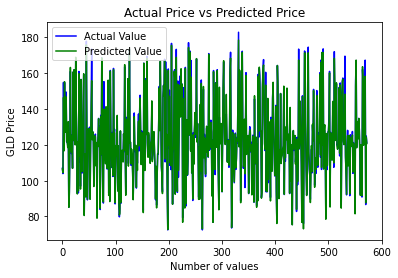

In [36]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()